In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Car Sale.csv")

In [3]:
df

Car_id        Date Customer Name  Gender  Annual Income  \
0      C_CND_000001    1/2/2022     Geraldine    Male          13500   
1      C_CND_000002    1/2/2022           Gia    Male        1480000   
2      C_CND_000003    1/2/2022        Gianna    Male        1035000   
3      C_CND_000004    1/2/2022       Giselle    Male          13500   
4      C_CND_000005    1/2/2022         Grace    Male        1465000   
...             ...         ...           ...     ...            ...   
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedition   
1                         C & M Motors Inc      Dodge     Durango   
2                              Capitol KIA   Cadillac    Eldorado   
3                   Chrysler of Tri-Cities     Toyota      Celica   
4                        Chrysler Plymouth      Acura          TL   
...                                    ...        ...         ...   
23901                     C & M Motors Inc   Plymouth     Voyager   
23902       Ryder Truck Rental and Leasing  Chevrolet       Prizm   
23903               Chrysler of Tri-Cities        BMW        328i   
23904                    Chrysler Plymouth  Chevrolet       Metro   
23905                      Pars Auto Sales      Lexus       ES300   

                          Engine Transmission       Color  Price ($)  \
0      DoubleÂ Overhead Camshaft         Auto       Black      26000   
1      DoubleÂ Overhead Camshaft         Auto       Black      19000   
2              Overhead Camshaft       Manual         Red      31500   
3              Overhead Camshaft       Manual  Pale White      14000   
4      DoubleÂ Overhead Camshaft         Auto         Red      24500   
...                          ...          ...         ...        ...   
23901          Overhead Camshaft       Manual         Red      12000   
23902  DoubleÂ Overhead Camshaft         Auto       Black      16000   
23903          Overhead Camshaft       Manual         Red      21000   
23904  DoubleÂ Overhead Camshaft         Auto       Black      31000   
23905  DoubleÂ Overhead Camshaft         Auto  Pale White      27500   

       Dealer_No  Body Style    Phone Dealer_Region  
0      06457-3834        SUV  8264678    Middletown  
1      60504-7114        SUV  6848189        Aurora  
2      38701-8047  Passenger  7298798    Greenville  
3      99301-3882        SUV  6257557         Pasco  
4      53546-9427  Hatchback  7081483    Janesville  
...           ...        ...      ...           ...  
23901  60504-7114  Passenger  8583598         Pasco  
23902  06457-3834    Hardtop  7914229    Middletown  
23903  99301-3882      Sedan  7659127    Scottsdale  
23904  53546-9427  Passenger  6030764        Austin  
23905  38701-8047    Hardtop  7020564    Middletown  

[23906 rows x 16 columns]

In [4]:
df.shape

(23906, 16)

In [ ]:
df.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [ ]:
df.describe(include='number')

Annual Income     Price ($)         Phone
count   2.390600e+04  23906.000000  2.390600e+04
mean    8.308403e+05  28090.247846  7.497741e+06
std     7.200064e+05  14788.687608  8.674920e+05
min     1.008000e+04   1200.000000  6.000101e+06
25%     3.860000e+05  18001.000000  6.746495e+06
50%     7.350000e+05  23000.000000  7.496198e+06
75%     1.175750e+06  34000.000000  8.248146e+06
max     1.120000e+07  85800.000000  8.999579e+06

# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers ?

In [ ]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
x = df['Dealer_No '].unique()

In [ ]:
x

array(['06457-3834', '60504-7114', '38701-8047', '99301-3882',
       '53546-9427', '85257-3102', '78758-7841'], dtype=object)

In [ ]:
len(x)

7

In [ ]:
pd.crosstab( df['Dealer_No '], df['Price ($)'].mean())

col_0       28090.247846
Dealer_No               
06457-3834          3132
38701-8047          3132
53546-9427          3813
60504-7114          3130
78758-7841          3753
85257-3102          3814
99301-3882          3132

# 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends ?

In [ ]:
brand = df['Company'].unique()

In [ ]:
df['Price ($)'].describe()

count    23906.000000
mean     28090.247846
std      14788.687608
min       1200.000000
25%      18001.000000
50%      23000.000000
75%      34000.000000
max      85800.000000
Name: Price ($), dtype: float64

In [ ]:
brand

array(['Ford', 'Dodge', 'Cadillac', 'Toyota', 'Acura', 'Mitsubishi',
       'Chevrolet', 'Nissan', 'Mercury', 'BMW', 'Chrysler', 'Subaru',
       'Hyundai', 'Honda', 'Infiniti', 'Audi', 'Porsche', 'Volkswagen',
       'Buick', 'Saturn', 'Mercedes-B', 'Jaguar', 'Volvo', 'Pontiac',
       'Lincoln', 'Oldsmobile', 'Lexus', 'Plymouth', 'Saab', 'Jeep'],
      dtype=object)

In [ ]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print("Number of Numerical Features are: ", len(num_features))

Number of Numerical Features are:  3


In [ ]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Number of categorical Features are: ", len(cat_features))

Number of categorical Features are:  13


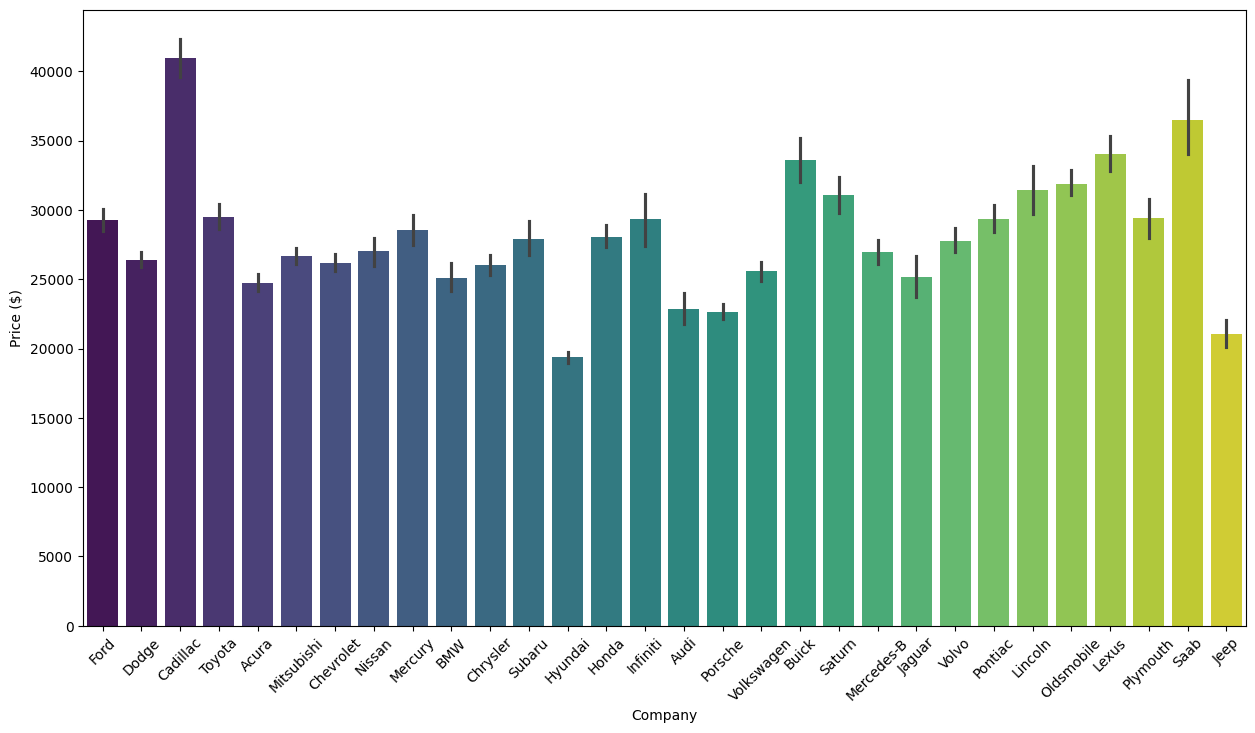

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x = df['Company'], y =  df['Price ($)'] , data=df, palette = 'viridis')
plt.xticks(rotation = 45)
plt.show()


In [ ]:
df['Company'].unique()

array(['Ford', 'Dodge', 'Cadillac', 'Toyota', 'Acura', 'Mitsubishi',
       'Chevrolet', 'Nissan', 'Mercury', 'BMW', 'Chrysler', 'Subaru',
       'Hyundai', 'Honda', 'Infiniti', 'Audi', 'Porsche', 'Volkswagen',
       'Buick', 'Saturn', 'Mercedes-B', 'Jaguar', 'Volvo', 'Pontiac',
       'Lincoln', 'Oldsmobile', 'Lexus', 'Plymouth', 'Saab', 'Jeep'],
      dtype=object)

In [ ]:
len(df['Company'].unique())

30

In [ ]:
 df_fil = pd.crosstab(df['Company'], df['Price ($)']).T

In [ ]:
df_fil

Company    Acura  Audi  BMW  Buick  Cadillac  Chevrolet  Chrysler  Dodge  \
Price ($)                                                                  
1200           0     0    0      0         0          0         0      0   
1450           0     0    0      0         0          0         0      0   
1700           0     0    0      0         0          0         0      0   
2200           0     0    0      0         0          0         0      0   
4200           0     0    0      0         0          0         0      0   
...          ...   ...  ...    ...       ...        ...       ...    ...   
85400          0     0    0      0         1          0         0      0   
85500          0     1    0      0         1          0         0      0   
85600          0     0    0      0         1          0         0      0   
85601          0     0    0      0         1          0         0      0   
85800          0     0    0      0         1          0         0      0   

Company    Ford  Honda  ...  Oldsmobile  Plymouth  Pontiac  Porsche  Saab  \
Price ($)               ...                                                 
1200          1      0  ...           0         0        0        0     0   
1450          0      0  ...           0         0        0        0     0   
1700          0      0  ...           0         0        0        0     0   
2200          0      0  ...           0         0        0        0     0   
4200          1      0  ...           0         0        0        0     0   
...         ...    ...  ...         ...       ...      ...      ...   ...   
85400         0      0  ...           0         0        0        0     0   
85500         0      0  ...           0         0        0        0     0   
85600         0      0  ...           0         0        0        0     0   
85601         0      0  ...           0         0        0        0     0   
85800         0      0  ...           0         0        0        0     0   

Company    Saturn  Subaru  Toyota  Volkswagen  Volvo  
Price ($)                                             
1200            0       0       0           0      0  
1450            0       0       0           0      0  
1700            0       0       0           0      0  
2200            0       0       0           0      0  
4200            0       0       0           0      0  
...           ...     ...     ...         ...    ...  
85400           0       0       0           0      0  
85500           0       0       0           0      0  
85600           0       0       1           0      0  
85601           0       0       0           0      0  
85800           0       0       0           0      0  

[870 rows x 30 columns]

In [ ]:
df_fil.columns

Index(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler',
       'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep',
       'Lexus', 'Lincoln', 'Mercedes-B', 'Mercury', 'Mitsubishi', 'Nissan',
       'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Saab', 'Saturn',
       'Subaru', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype='object', name='Company')

In [ ]:
df_fil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 870 entries, 1200 to 85800
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Acura       870 non-null    int64
 1   Audi        870 non-null    int64
 2   BMW         870 non-null    int64
 3   Buick       870 non-null    int64
 4   Cadillac    870 non-null    int64
 5   Chevrolet   870 non-null    int64
 6   Chrysler    870 non-null    int64
 7   Dodge       870 non-null    int64
 8   Ford        870 non-null    int64
 9   Honda       870 non-null    int64
 10  Hyundai     870 non-null    int64
 11  Infiniti    870 non-null    int64
 12  Jaguar      870 non-null    int64
 13  Jeep        870 non-null    int64
 14  Lexus       870 non-null    int64
 15  Lincoln     870 non-null    int64
 16  Mercedes-B  870 non-null    int64
 17  Mercury     870 non-null    int64
 18  Mitsubishi  870 non-null    int64
 19  Nissan      870 non-null    int64
 20  Oldsmobile  870 non-null    int6

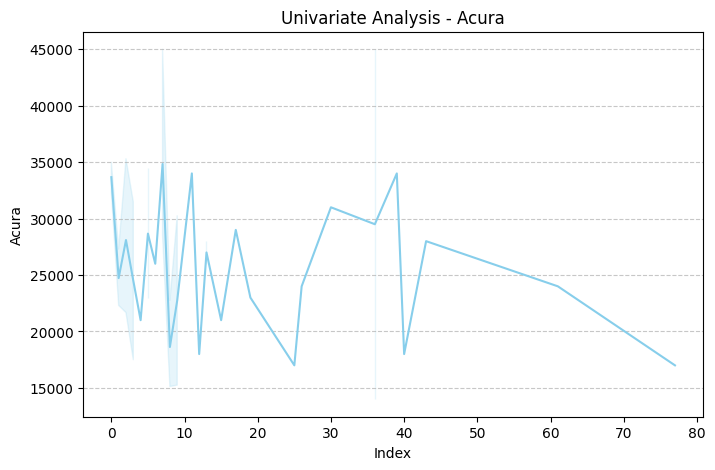

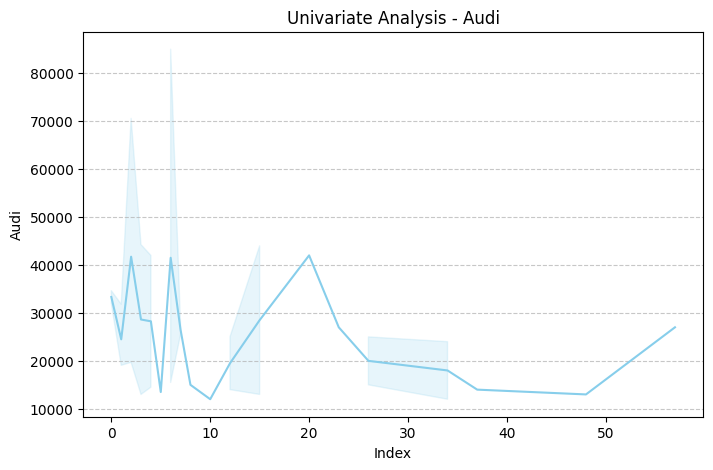

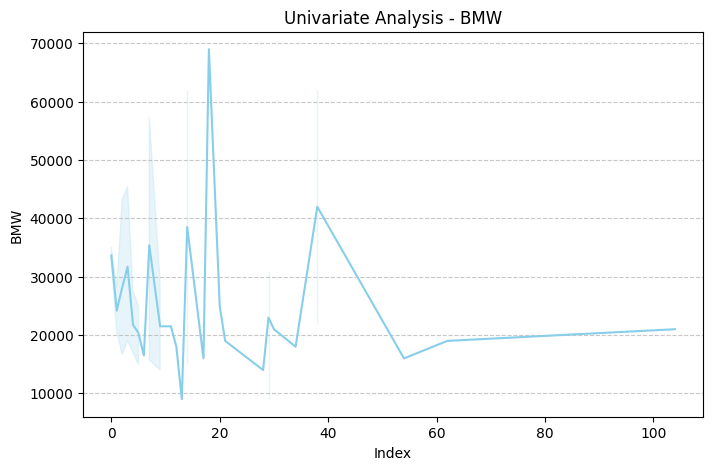

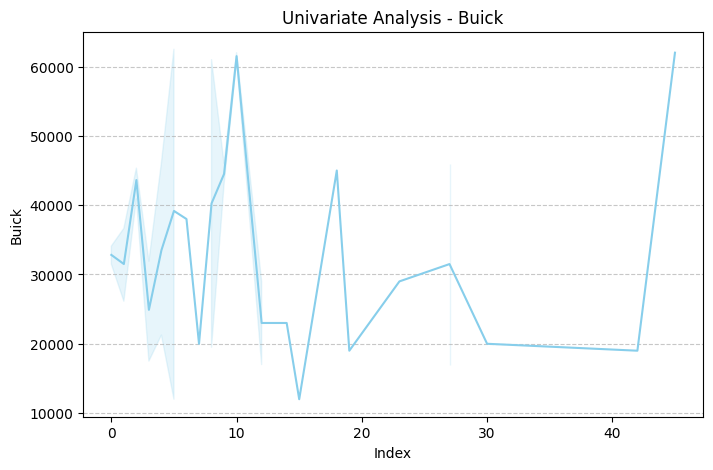

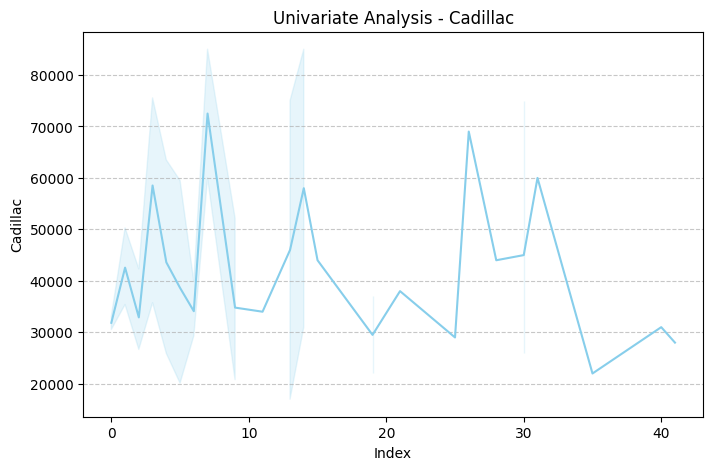

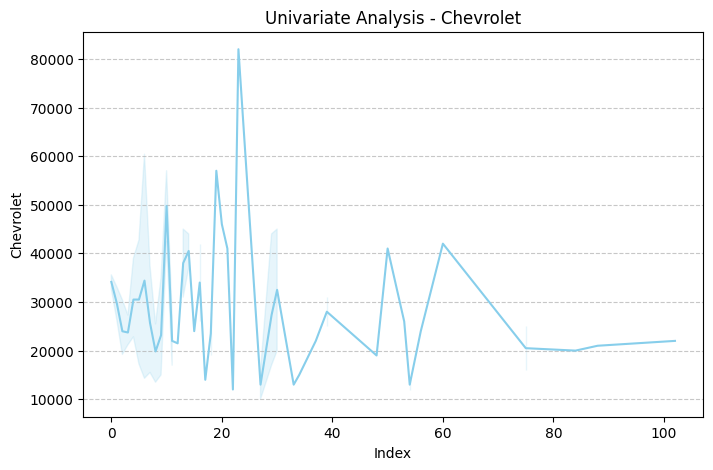

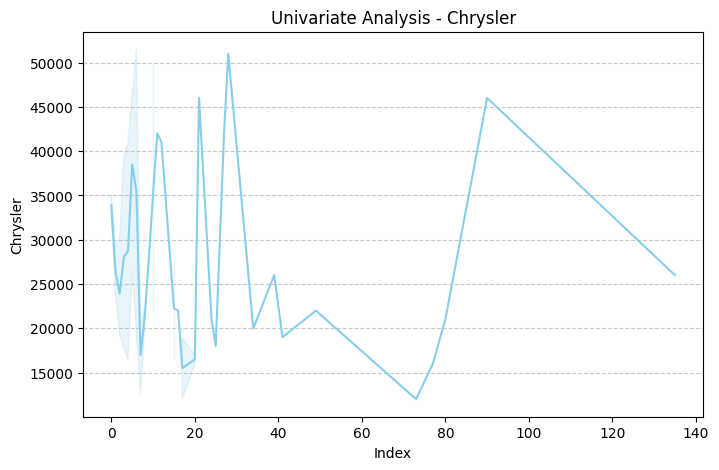

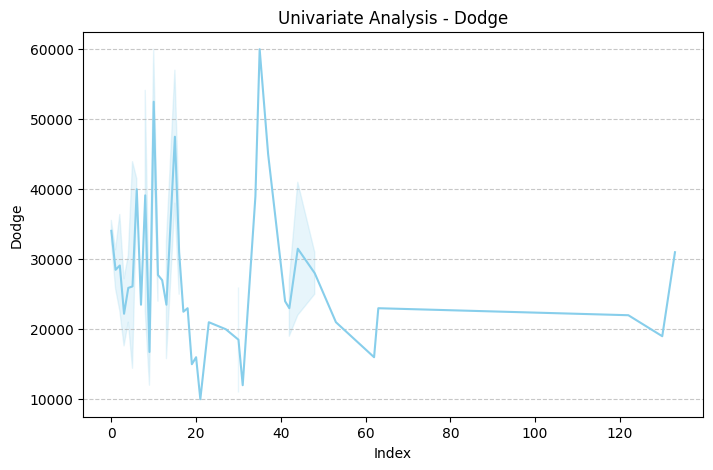

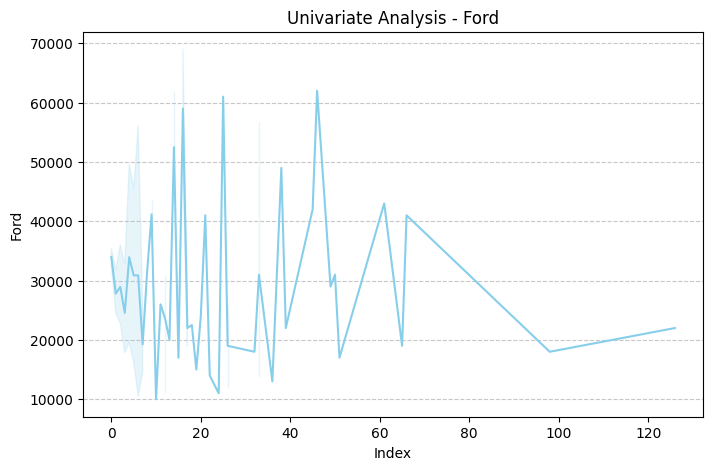

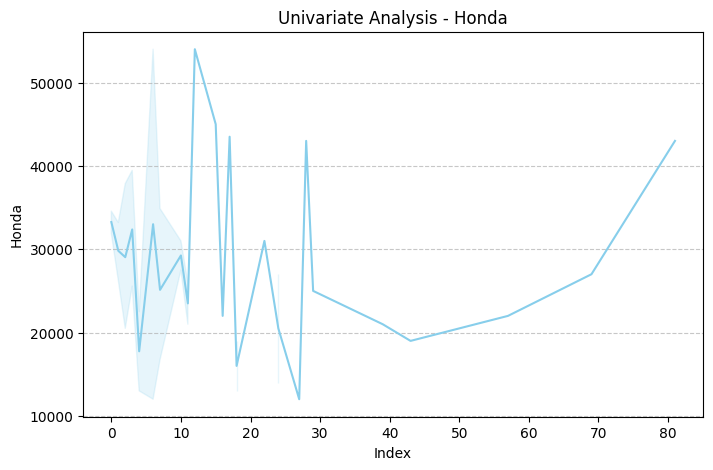

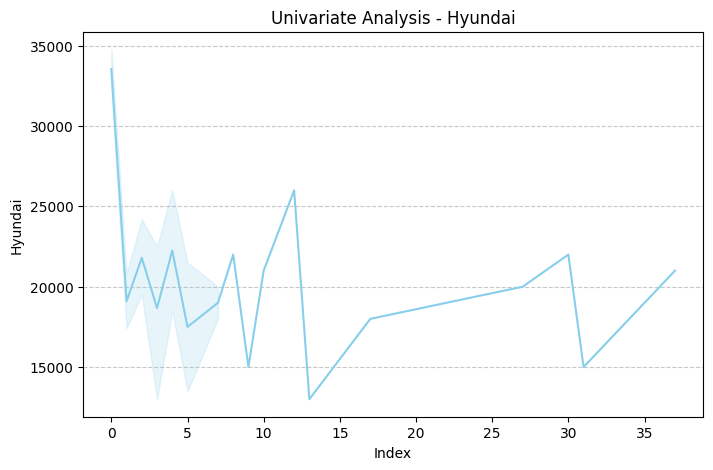

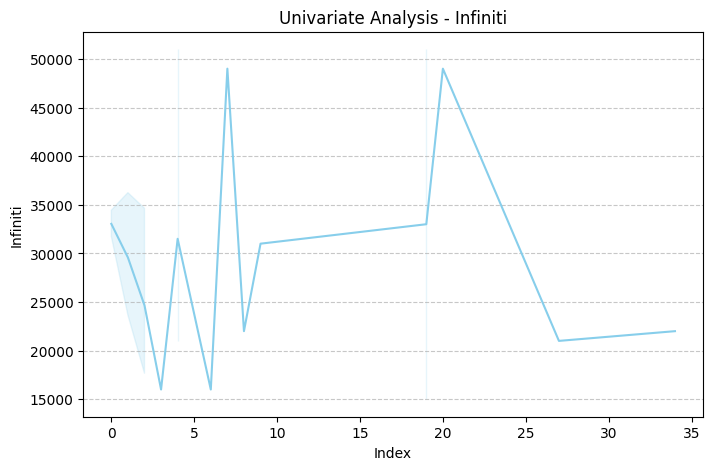

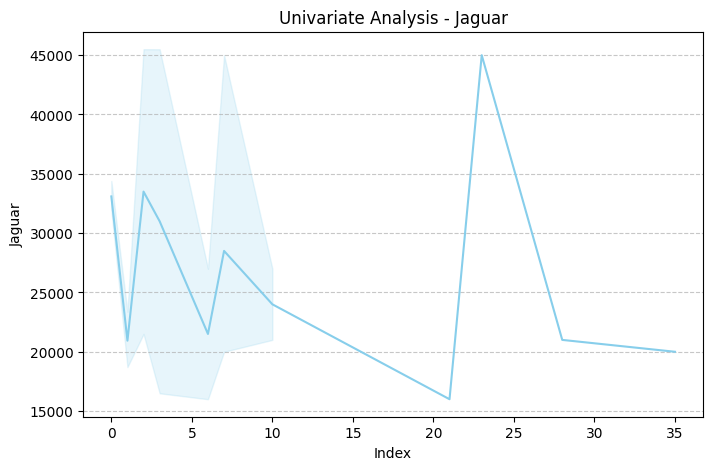

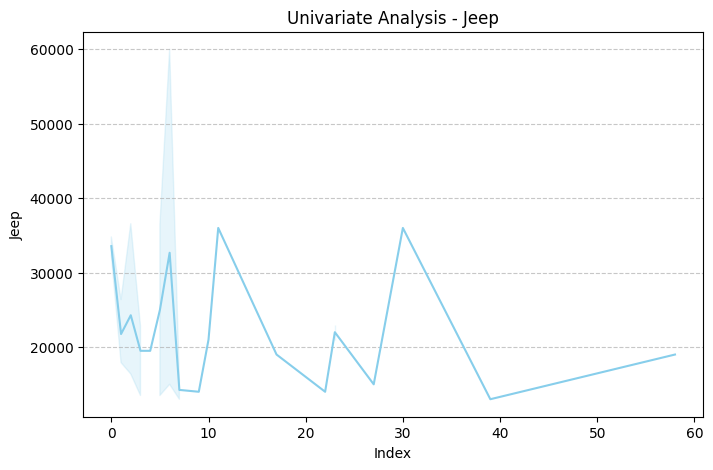

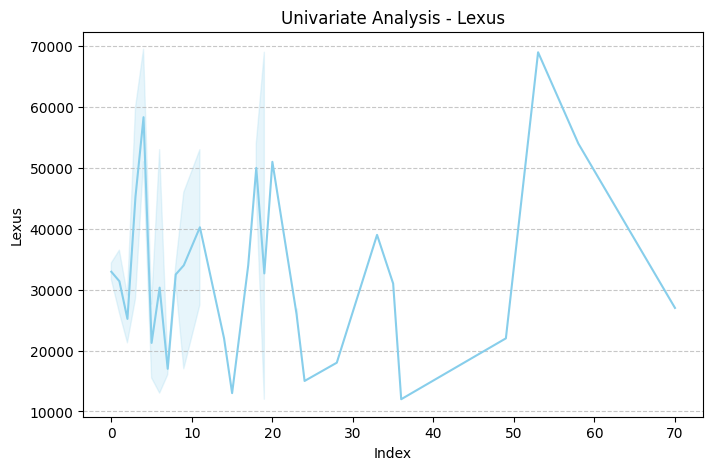

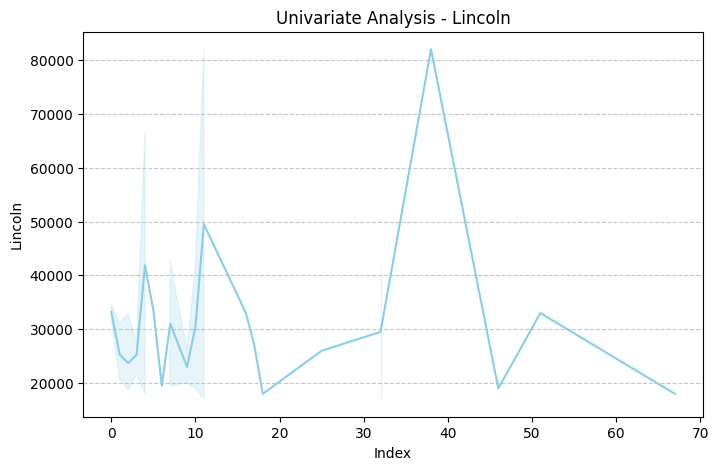

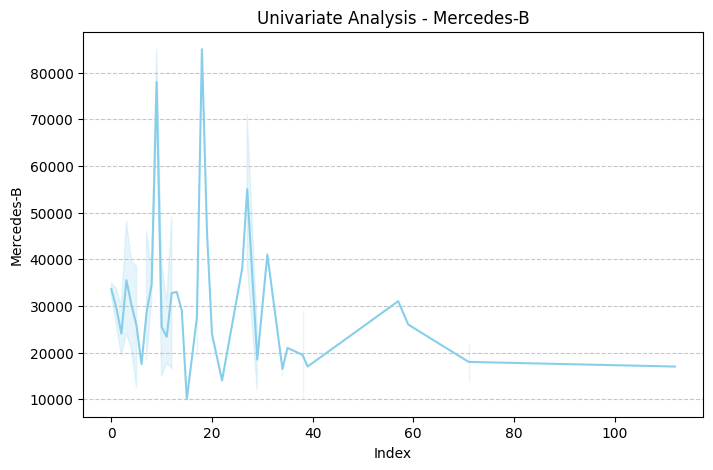

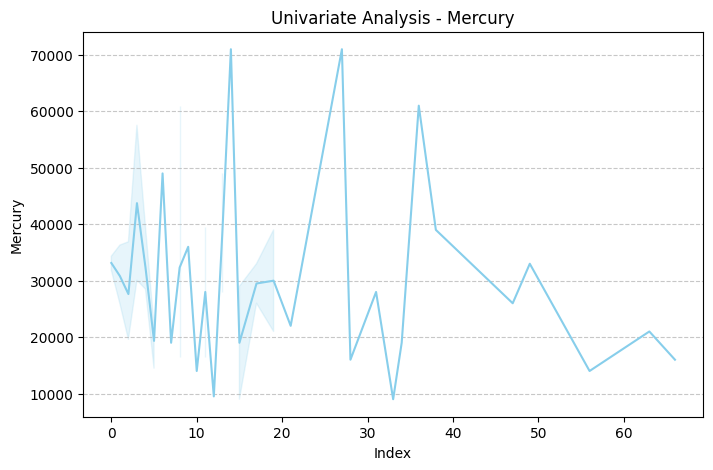

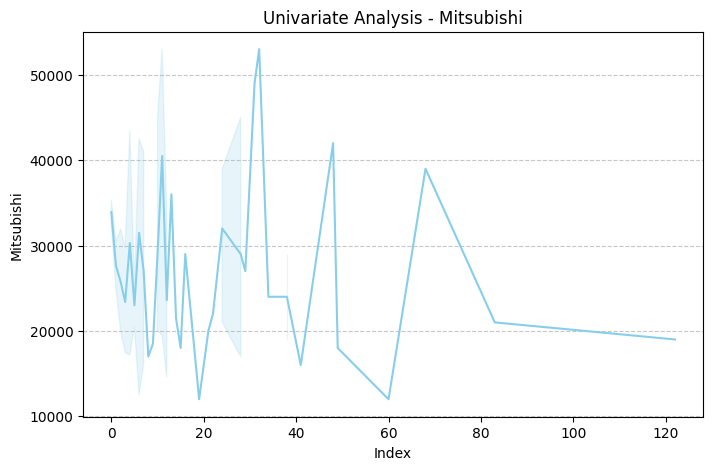

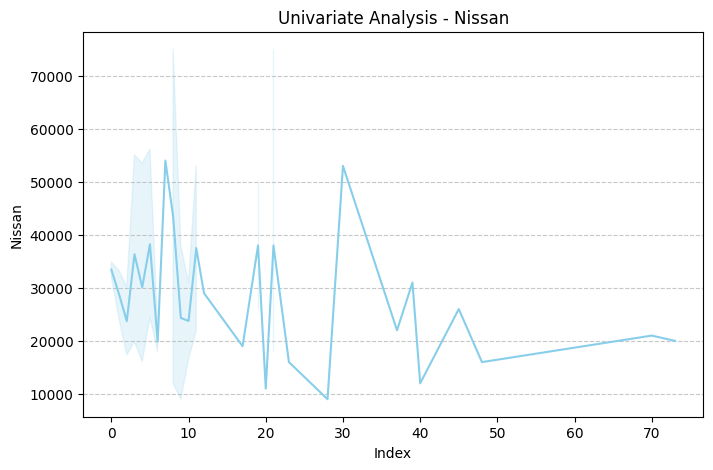

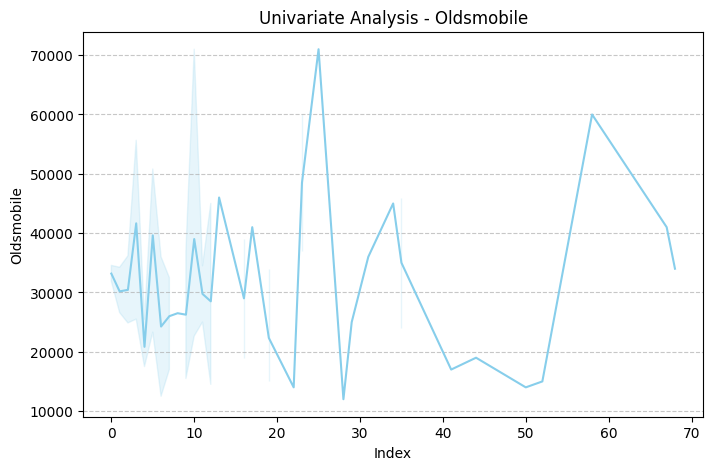

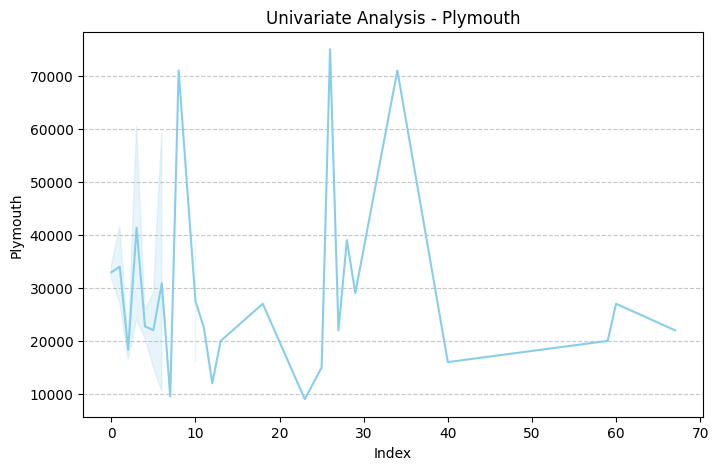

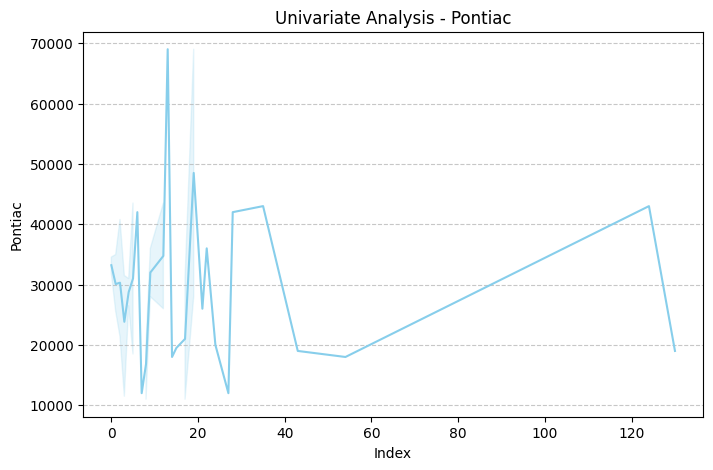

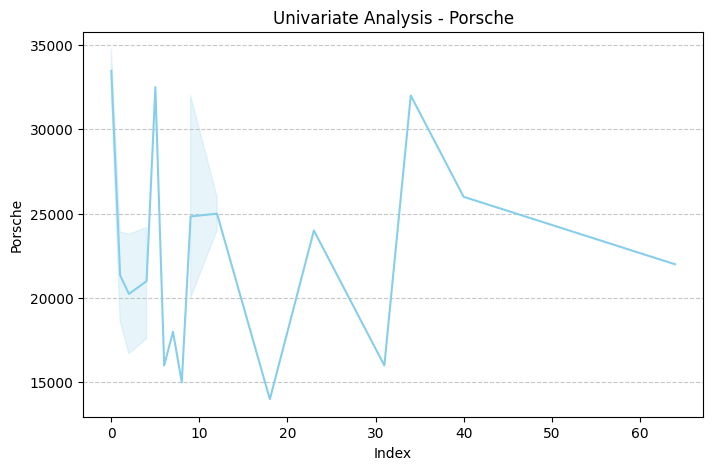

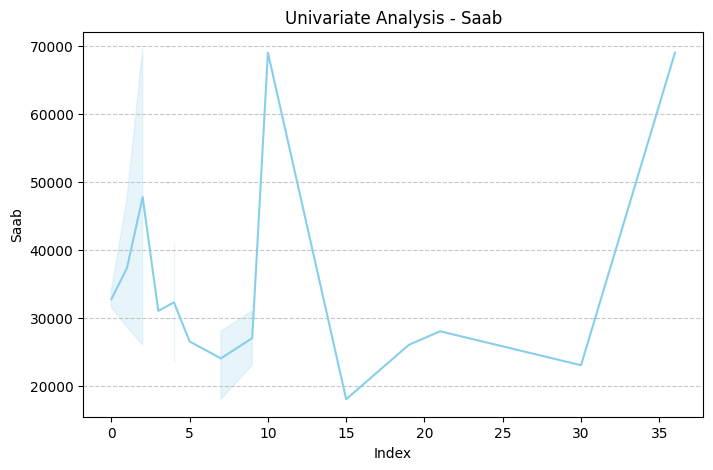

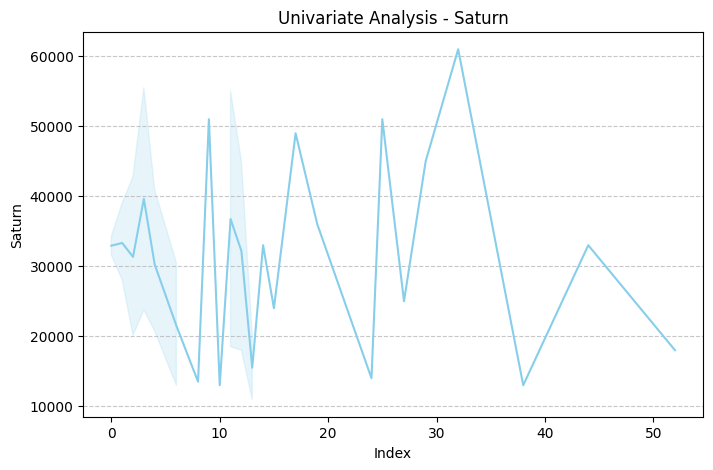

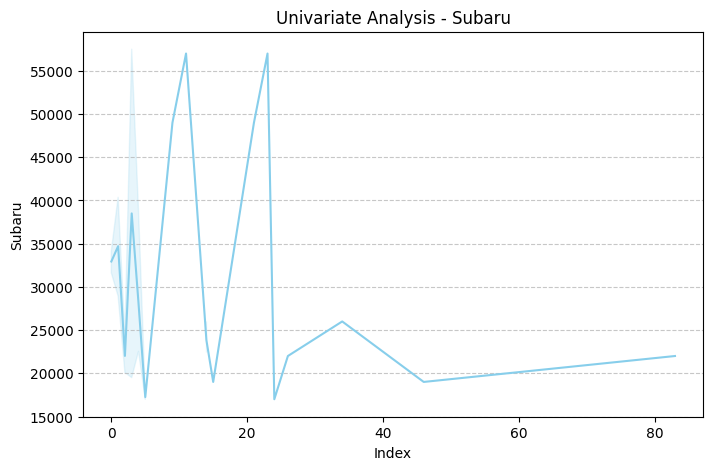

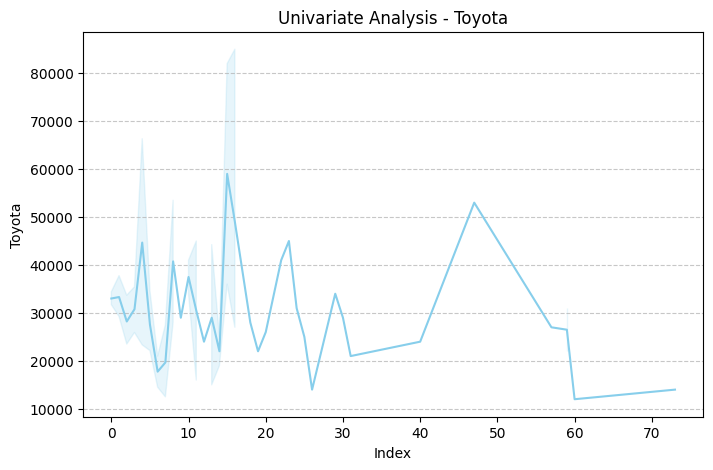

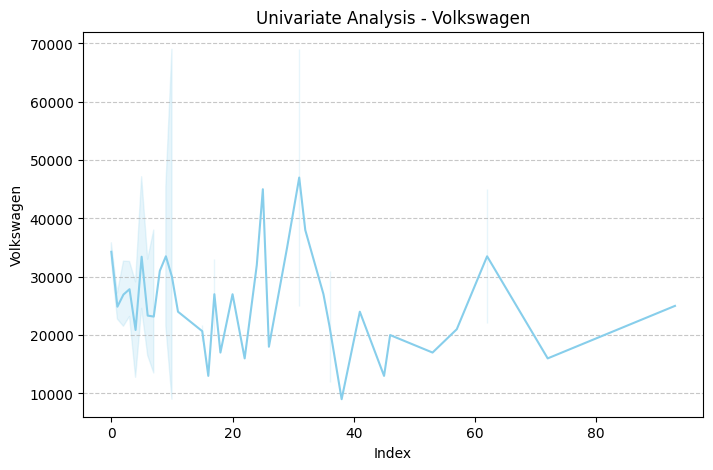

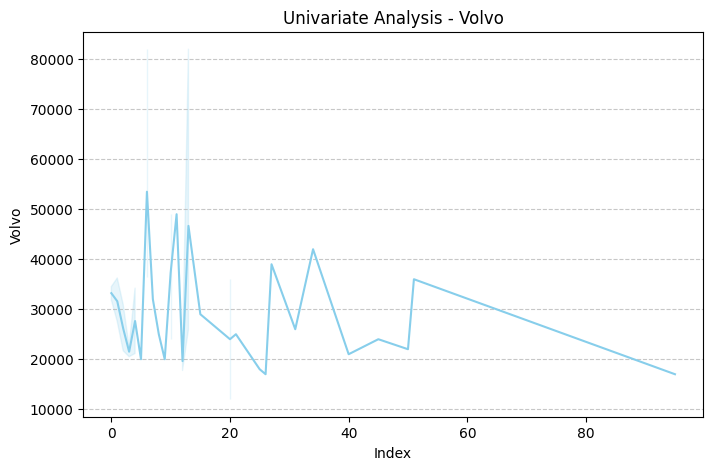

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each numeric column in the DataFrame
for num_column in df_fil.select_dtypes(include=['number']).columns:  # Select only numeric columns
    plt.figure(figsize=(8, 5))

    # Create a line plot for the current numeric column
    sns.lineplot(x = df_fil[num_column], y=df_fil.index, color='skyblue')

    # Add title and labels
    plt.title(f'Univariate Analysis - {num_column}')
    plt.xlabel('Index')  # X-axis represents the index of the DataFrame
    plt.ylabel(num_column)  # Y-axis represents the values of the column
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability

    plt.show()


In [ ]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

# 3.  What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare ?

In [ ]:
df['Transmission'].unique()

array(['Auto', 'Manual'], dtype=object)

<Axes: xlabel='Transmission', ylabel='Price ($)'>

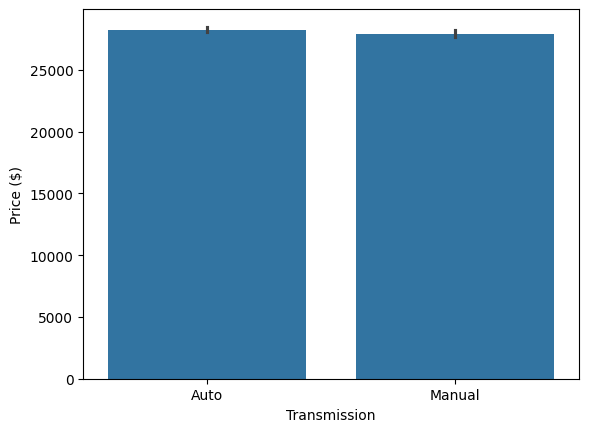

In [ ]:
sns.barplot(df , x = df['Transmission'] , y = df['Price ($)'])

In [ ]:
# Calculate Q1 and Q3
Q1 = df['Price ($)'].quantile(0.25)
Q3 = df['Price ($)'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper fences
lower_fence = Q1 - (1.5 * IQR)
upper_fence = Q3 + (1.5 * IQR)

# Filter the DataFrame to exclude outliers
df_filtered = df[(df['Price ($)'] >= lower_fence) & (df['Price ($)'] <= upper_fence)]

# Display the filtered DataFrame
df_filtered


Car_id        Date Customer Name  Gender  Annual Income  \
0      C_CND_000001    1/2/2022     Geraldine    Male          13500   
1      C_CND_000002    1/2/2022           Gia    Male        1480000   
2      C_CND_000003    1/2/2022        Gianna    Male        1035000   
3      C_CND_000004    1/2/2022       Giselle    Male          13500   
4      C_CND_000005    1/2/2022         Grace    Male        1465000   
...             ...         ...           ...     ...            ...   
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedition   
1                         C & M Motors Inc      Dodge     Durango   
2                              Capitol KIA   Cadillac    Eldorado   
3                   Chrysler of Tri-Cities     Toyota      Celica   
4                        Chrysler Plymouth      Acura          TL   
...                                    ...        ...         ...   
23901                     C & M Motors Inc   Plymouth     Voyager   
23902       Ryder Truck Rental and Leasing  Chevrolet       Prizm   
23903               Chrysler of Tri-Cities        BMW        328i   
23904                    Chrysler Plymouth  Chevrolet       Metro   
23905                      Pars Auto Sales      Lexus       ES300   

                          Engine Transmission       Color  Price ($)  \
0      DoubleÂ Overhead Camshaft         Auto       Black      26000   
1      DoubleÂ Overhead Camshaft         Auto       Black      19000   
2              Overhead Camshaft       Manual         Red      31500   
3              Overhead Camshaft       Manual  Pale White      14000   
4      DoubleÂ Overhead Camshaft         Auto         Red      24500   
...                          ...          ...         ...        ...   
23901          Overhead Camshaft       Manual         Red      12000   
23902  DoubleÂ Overhead Camshaft         Auto       Black      16000   
23903          Overhead Camshaft       Manual         Red      21000   
23904  DoubleÂ Overhead Camshaft         Auto       Black      31000   
23905  DoubleÂ Overhead Camshaft         Auto  Pale White      27500   

       Dealer_No  Body Style    Phone Dealer_Region  
0      06457-3834        SUV  8264678    Middletown  
1      60504-7114        SUV  6848189        Aurora  
2      38701-8047  Passenger  7298798    Greenville  
3      99301-3882        SUV  6257557         Pasco  
4      53546-9427  Hatchback  7081483    Janesville  
...           ...        ...      ...           ...  
23901  60504-7114  Passenger  8583598         Pasco  
23902  06457-3834    Hardtop  7914229    Middletown  
23903  99301-3882      Sedan  7659127    Scottsdale  
23904  53546-9427  Passenger  6030764        Austin  
23905  38701-8047    Hardtop  7020564    Middletown  

[22457 rows x 16 columns]

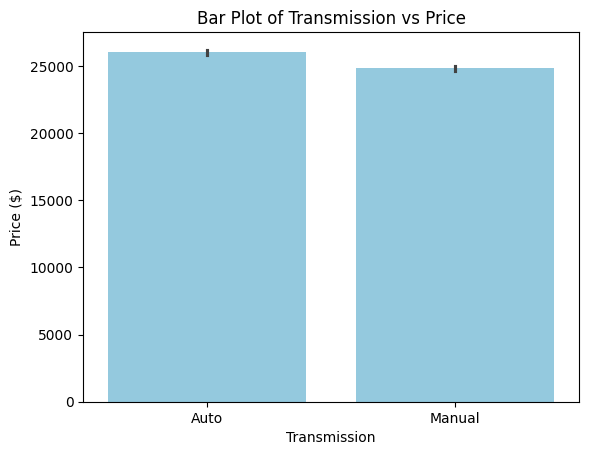

In [ ]:
sns.barplot(data=df_filtered, x='Transmission', y='Price ($)', color='skyblue')
plt.title('Bar Plot of Transmission vs Price')
plt.xlabel('Transmission')
plt.ylabel('Price ($)')
plt.show()


In [ ]:
# the price of Transmission of Auto and Manual is all most same .

# 4. What is the distribution of car prices across different regions?

In [ ]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
fig = px.scatter(df ,  x = 'Dealer_Region', y = 'Price ($)' , color = 'Color' )
fig.show()

# 5. What is the distribution of cars based on body styles ?

In [ ]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
df['Body Style'].unique()

array(['SUV', 'Passenger', 'Hatchback', 'Hardtop', 'Sedan'], dtype=object)

In [ ]:
fig = px.scatter(df ,  x =  'Body Style',  y = 'Price ($)' , color = 'Color' )
fig.show()

# 6. How does the average selling price of cars vary by customer gender and annual income ?

In [ ]:
df_filtered.columns

In [ ]:
fig = px.scatter(df_filtered ,  x = 'Annual Income'  ,  y = 'Price ($)' , color = 'Gender')
fig.show()

In [ ]:
# With people with same income have both high price and low price cars
# most of the female income between 0 to 2M($)

# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region ?

In [ ]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
fig = px.scatter(df_filtered ,  x = 'Annual Income'  ,  y = 'Price ($)' , color = 'Gender')
fig.show()

In [ ]:
fig = px.scatter(df ,  x = 'Dealer_Region', y = 'Price ($)' , color = 'Dealer_Region' )
fig.show()

In [ ]:
# With the help of aboyt graphy we can say
# 1. different between all dealer_Region and Price($) is very less
# 2. highest cars sold in Middletown
# 3. lowest cars sold in Scottsdale

# 8. How does the average car price differ between cars with different engine sizes ?

In [ ]:
x = df.groupby(['Engine'])['Price ($)'].mean().sort_values(ascending = False).reset_index()
x

Engine     Price ($)
0  DoubleÂ Overhead Camshaft  28248.525972
1          Overhead Camshaft  27914.710631

In [ ]:
# With above table we can say that average price between different engine size is very less (300$)

# 9. How do car prices vary based on the customer’s annual income bracket ?

In [ ]:
# "With reference to Q6, it is observed that the annual income increase correlates with car prices being in the mid-range.
# Most of the expensive cars are owned by people whose annual income is between $0 and $2M."

# 10 What are the top 5 car models with the highest number of sales, and how does their price distribution look ?

In [ ]:
df['Model'].value_counts()

Model
Diamante         418
Silhouette       411
Prizm            411
Passat           391
Ram Pickup       383
                ... 
Mirage            19
Alero             18
RX300             15
Avalon            15
Sebring Conv.     10
Name: count, Length: 154, dtype: int64

In [ ]:
df_model_5 = df[df['Model'].isin(['Diamante', 'Silhouette', 'Prizm', 'Passat', 'Ram Pickup'])]

In [ ]:
df_model_5

Car_id        Date Customer Name  Gender  Annual Income  \
5      C_CND_000006    1/2/2022     Guadalupe    Male         850000   
69     C_CND_000070    1/4/2022          Toby    Male          13500   
91     C_CND_000092    1/5/2022      Mauricio    Male          13500   
107    C_CND_000108    1/6/2022          Noel    Male        1362000   
116    C_CND_000117    1/9/2022          Jake    Male         700000   
...             ...         ...           ...     ...            ...   
23868  C_CND_023869  12/30/2023        Youenn  Female          13500   
23882  C_CND_023883  12/31/2023      Victoria    Male         501000   
23884  C_CND_023885  12/31/2023        Winnie    Male         820500   
23890  C_CND_023891  12/31/2023       Joaquin    Male        2450000   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   

                          Dealer_Name     Company       Model  \
5                       Classic Chevy  Mitsubishi    Diamante   
69            Clay Johnson Auto Sales  Mitsubishi    Diamante   
91                      Race Car Help       Dodge  Ram Pickup   
107            Chrysler of Tri-Cities   Chevrolet       Prizm   
116       Motor Vehicle Branch Office  Mitsubishi    Diamante   
...                               ...         ...         ...   
23868            Star Enterprises Inc  Volkswagen      Passat   
23882                   Suburban Ford   Chevrolet       Prizm   
23884                       U-Haul CO       Dodge  Ram Pickup   
23890                Saab-Belle Dodge       Dodge  Ram Pickup   
23902  Ryder Truck Rental and Leasing   Chevrolet       Prizm   

                          Engine Transmission       Color  Price ($)  \
5              Overhead Camshaft       Manual  Pale White      12000   
69     DoubleÂ Overhead Camshaft         Auto  Pale White      21000   
91             Overhead Camshaft       Manual  Pale White      21001   
107            Overhead Camshaft       Manual  Pale White      21200   
116            Overhead Camshaft       Manual       Black      49000   
...                          ...          ...         ...        ...   
23868  DoubleÂ Overhead Camshaft         Auto  Pale White      31000   
23882          Overhead Camshaft       Manual         Red      22001   
23884  DoubleÂ Overhead Camshaft         Auto  Pale White      45500   
23890          Overhead Camshaft       Manual  Pale White      20001   
23902  DoubleÂ Overhead Camshaft         Auto       Black      16000   

       Dealer_No  Body Style    Phone Dealer_Region  
5      85257-3102  Hatchback  7315216    Scottsdale  
69     78758-7841  Hatchback  8822935         Pasco  
91     78758-7841    Hardtop  8188037        Austin  
107    99301-3882    Hardtop  6633882         Pasco  
116    78758-7841  Hatchback  7757499        Austin  
...           ...        ...      ...           ...  
23868  99301-3882  Hatchback  8231925    Scottsdale  
23882  53546-9427  Hatchback  8455104    Janesville  
23884  78758-7841  Hatchback  8519129        Austin  
23890  60504-7114    Hardtop  6172324        Aurora  
23902  06457-3834    Hardtop  7914229    Middletown  

[2014 rows x 16 columns]

In [ ]:
df_model_5.Model.unique()

array(['Diamante', 'Ram Pickup', 'Prizm', 'Silhouette', 'Passat'],
      dtype=object)

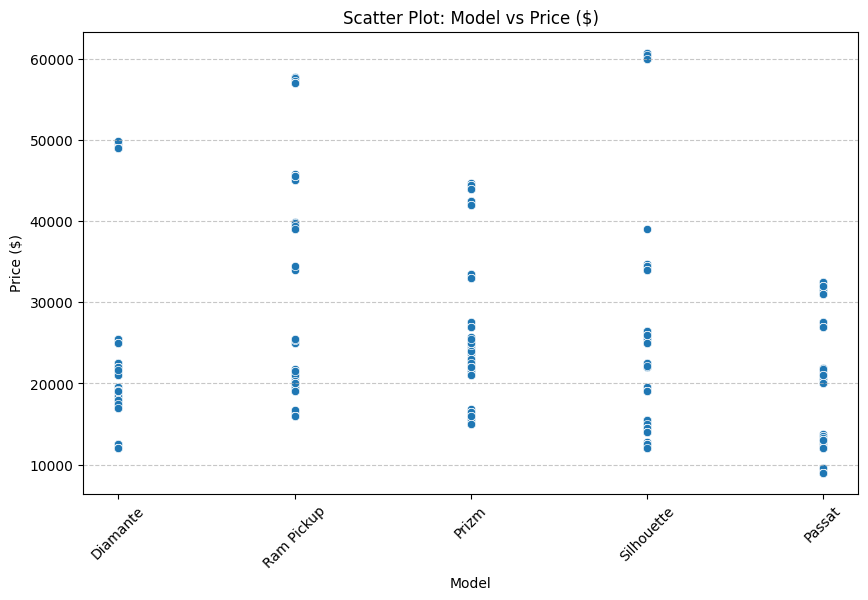

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Model vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Model', y='Price ($)', data=df_model_5, palette='coolwarm')
plt.title("Scatter Plot: Model vs Price ($)")
plt.xlabel("Model")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
plt.show()


# 11. How does car price vary with engine size across different car colors, and which colors have the highest price variation ?

In [ ]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
fig = px.scatter(df ,  x = 'Engine' , y = 'Price ($)' , color = 'Color')
fig.show()

In [ ]:
# the Black color have highest price($) variation

# 13. How does the car price distribution change when considering different combinations of body style and transmission type?


In [ ]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
fig = px.scatter(df ,  x = 'Body Style' , y = 'Price ($)' , color = 'Transmission')
fig.show()

In [ ]:
# Most of the highest price($) cars are Manual
# Price($) distribution change in Manual is less
# But Price($) distribution change in Auto is high.

# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact ?

In [6]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [5]:
df['Engine'].unique()

array(['DoubleÂ\xa0Overhead Camshaft', 'Overhead Camshaft'], dtype=object)

In [13]:
df['Engine'] = df['Engine'].str.replace("DoubleÂ\xa0Overhead Camshaft" ,"1" ).str.replace("Overhead Camshaft" , "0")

In [14]:
df['Engine'].astype(int)

0        1
1        1
2        0
3        0
4        1
        ..
23901    0
23902    1
23903    0
23904    1
23905    1
Name: Engine, Length: 23906, dtype: int64

In [25]:
corr = df[["Price ($)", "Engine",'Annual Income']].corr(numeric_only=True)

In [26]:
corr

Price ($)  Annual Income
Price ($)       1.000000       0.012065
Annual Income   0.012065       1.000000

<Axes: >

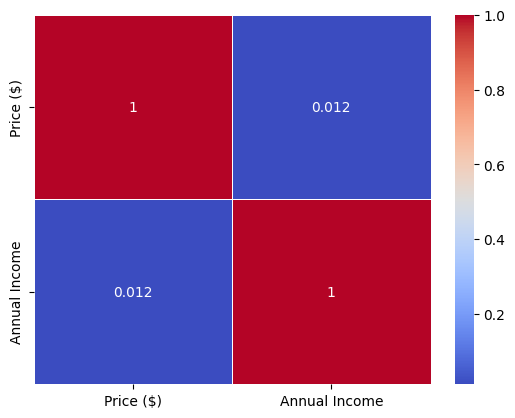

In [9]:
sns.heatmap(corr , annot = True , cmap = "coolwarm" , linewidth = 0.5)

# 15. How does the average car price vary across different car models and engine types?

In [ ]:
df.groupby('Annual Income').agg("Model","Engine")

In [28]:
df.groupby("Model").agg({'Annual Income' : 'mean' , 'Engine' : lambda x: x.mode().iloc[0] if not x.mode().empty else None})

Annual Income Engine
Model                         
3-Sep     866461.590643      1
3000GT    795903.960396      1
300M      787886.835391      1
323i      833144.230769      1
328i      814621.359223      1
...                 ...    ...
Viper     772708.541667      1
Voyager   826342.541436      0
Windstar  906561.570248      1
Wrangler  874431.634146      1
Xterra    696353.260870      1

[154 rows x 2 columns]

In [29]:
import pandas as pd
import plotly.express as px

# Group the data
grouped_data = df.groupby("Model").agg({
    'Annual Income': 'mean',
    'Engine': lambda x: x.mode().iloc[0] if not x.mode().empty else None
}).reset_index()

# Create a 3D scatter plot
fig = px.scatter_3d(
    grouped_data,
    x='Model',            # Categorical variable
    y='Annual Income',    # Numeric variable
    z='Engine',           # Numeric variable (or the mode value)
    color='Model',        # Optional: color points by Model
    title="3D Visualization of Grouped Data",
    labels={'Model': 'Car Model', 'Annual Income': 'Avg Annual Income', 'Engine': 'Most Common Engine'}
)

# Show the plot
fig.show()
